# Introduction to White Noise

In [1]:
import numpy as np
import random
from random import gauss
from random import seed
import pandas as pd
from pandas.plotting import autocorrelation_plot
#import pandas_profiling
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import seaborn as sns

In [2]:
def tsplot(y, 
           lags=None, 
           title='', 
           figsize=(14, 8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    
    Original source: https://tomaugspurger.github.io/modern-7-timeseries.html
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

==================================================================================================================

# Deterministic and Stochastic Processes

* **Deterministic process** does not involve randomness in the development of future states of the system. Therefore, it will always produce the same output from a given starting condition or initial state.

* **Stochastic process / random process** is a collection of random variables $\{X_t\}_{t\in T}$ indexed by a set $T$. In time series, $T$ often represents either $\mathbb{N}$ or $\mathbb{R}_{\geq 0}$. It differs from deterministic process as it involves randomness.

* **Mean** and **variance**  of a stochastic process are functions $M:T\to \mathbb{R}$ and $V:T\to \mathbb{R}_{\geq 0}$ defined by 

$$M(t) = E(X_t) \quad \text{and} \quad V(t) = Var(X_t).$$

* For instance, we could consider a process $\{𝑋_n\}_{n\in\mathbb{N}}$ in discrete time, where $𝑋_n \sim N(\mu_n,\sigma^2_n)$ for some $\mu_𝑛,\sigma_n\in \mathbb{N}$ with $\sigma_𝑛>0$. In this case we simply get

$$ M(n)=\mu_n \quad \text{and}\quad V(n)=\sigma_n^2.$$

==================================================================================================================

# Autocovariance, autocorrelation and partial autocorrelation

* Suppose that $\{X_t\}_t$ is a stochastic process.

* The $\textbf{autocovariance function}$ is defined as

$$\gamma(s,t) = cov(X_s,X_t) = E[(X_s-\mu_s)(X_t-\mu_t)] \quad \text{for all } s,t.$$

* Two natural implications are 

$$(1) \quad \gamma(s,t) = \gamma(t,s) \quad\text{and}\quad (2) \quad\gamma(s,s) = cov(X_s,X_s) = E[(X_s-\mu_s)^2]$$

* A correlation of a variable with itself at different times is known as $\textbf{autocorrelation}$. If a time series model is second-order stationary (i.e. stationary in both mean and variance: $\mu_t = \mu$ and $\sigma_t^2 = \sigma^2$ for all $t$), then an $\textit{autocovariance function}$ can be expressed as a function only of the time lag $k$:

$$ \gamma(k) = E[(X_t-\mu)(X_{t+k} - \mu)] $$
  
* Likewise, the autocorrelation function $\textit{acf}$ is defined as

$$ \rho(k) = \frac{\gamma(k)}{\gamma(0)} $$
  
* When $k=0$, $\rho(0) = 1$

* The $\textbf{partial autocorrelation}$ provide a relationship between two variables after removing third variable. Informally, the partial correlation between $X_t$ and $X_{t+h}$ is the autocorrelation between $X_t$ and $X_{t+h}$ without the contribution of $X_{t+1},X_{t+2},....,X_{t+k-1}.$

* Mathematically, it is defined as 

$$\phi_{kk} = Corr( X_t - P(X_t| X_{t+1},...,X_{t+k-1}), X_{t+k} - P(X_t| X_{t+1},...,X_{t+k-1})  )$$

where $P(W|Z)$ is the 'best linear projection' of $W$ on $Z$, that is, $P(W|Z) = Cov(W,Z) Var(Z)^{-1} Z.$
The 'best linear projection' is understood in the sense of minimizing the mean squared error.

* For more information on acf and pacf, please consult [Time Series Analysis by James Douglas Hamilton](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896)

==================================================================================================================

# White Noise

* White noise is the basic building block for most time series due to the Wold's decomposition theorem.

* White noise is a collection $\{\epsilon_t\}_t$ of random variables whose mean is 0 and autocovariance function satisfying

$$\gamma(h) = \begin{cases} 
      \sigma^2 & \text{ if } h = 0 \\
      0 & \text{ if } h \neq 0
   \end{cases} .$$
   
* White noise may not follow a normal distribution.

In [3]:
seed(1)

# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = pd.Series(series)
series.head()

0    1.288185
1    1.449446
2    0.066336
3   -0.764544
4   -1.092173
dtype: float64

In [4]:
# summary stats
series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

Observe that the mean is and standard deviation are slightly different from what we assign.
The following is a plot of the generate white noise.

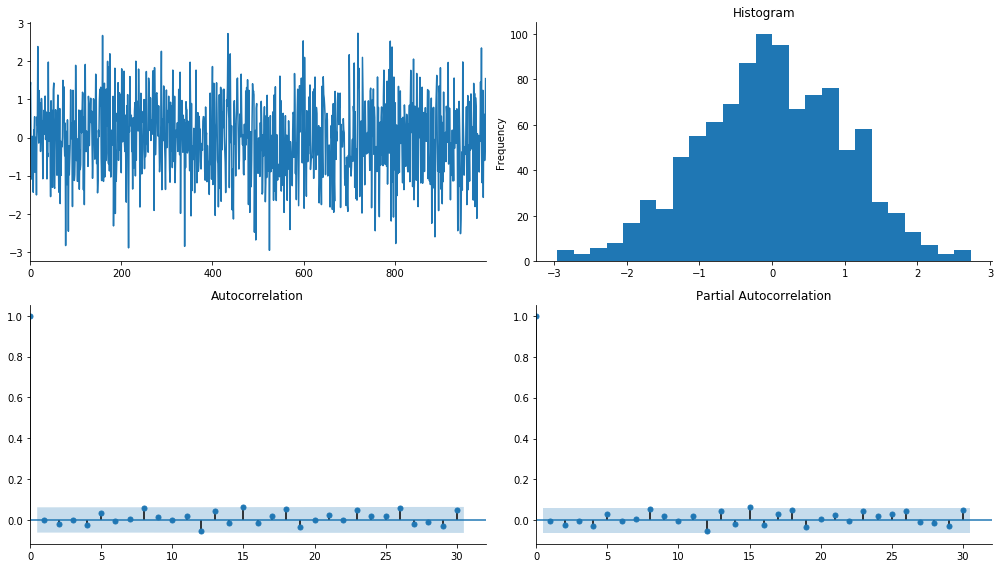

In [6]:
tsplot(series);

* White noise above exhibits random behavior but follows normal distribution. 

* Observe that autocorrelation and partial correlation of white noise are closed to 0.

* The following generates numbers using random number generators.  We want to verify whether the collection is a white noise or not.

In [7]:
numbers = pd.Series([random.randint(1,100) for i in range(1000)])
numbers.head()

0    53
1    19
2    17
3    33
4    25
dtype: int64

In [8]:
# summary stats
numbers.describe()

count    1000.000000
mean       51.236000
std        28.620053
min         1.000000
25%        26.750000
50%        51.000000
75%        76.000000
max       100.000000
dtype: float64

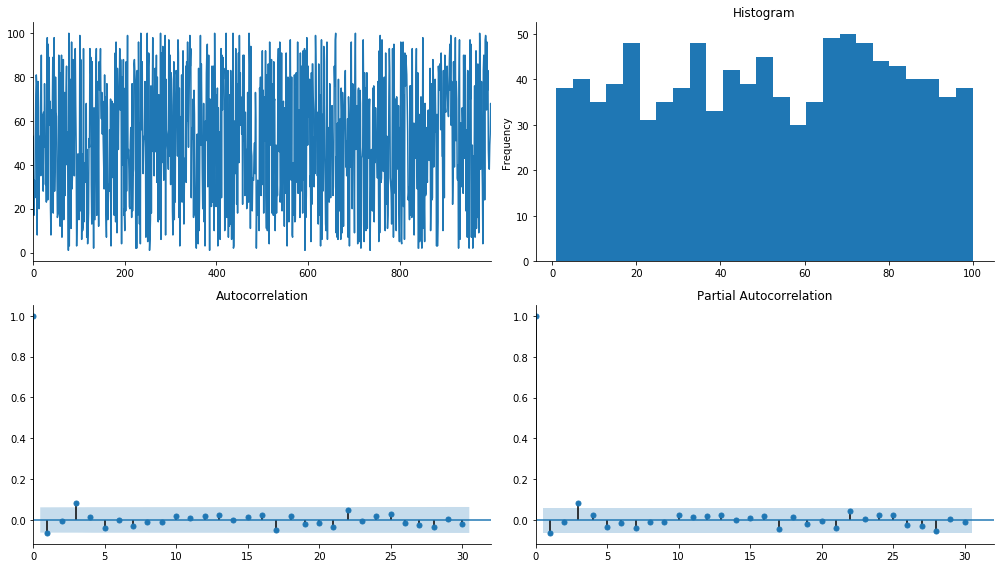

In [10]:
tsplot(numbers);

* From its autocorrelation and partial autocorrelation, it seems that random numbers generated above indeed a white noise.

* White noise is useful when looking at residual plot of forecasting models to determine whether they use all available information.